# Bonus Project with Padlet and PDF reporting
# TESSA NEJLA AYVAZOGLU

## Objective
### Our project aims to prepare investment decisions in a timely manner by providing live market distribution for stock rates, indices and other financial instruments. 
### This integration can expand the ability to analyze and predict real-time market trends, helping to retrieve stored and accumulated pieces.
### Following items:
- A select of a Mechine LEraning USe Case you are currently working on.
- Product of quick LR: two sources , along with keywords and focus points.
- A 50 word summary of your use case that include some of keywords and focus points.
- A selection of at least two dataset you founds while developing the use case.
- Development of a key research questions associate with the use case, folowing the method in the class notes.
- Wery draft of a future jupiter notebook conduct /execute EDA. The ipynb should include: 
-    -- Test data normality. correlation, (Wilcoxon, Spearman, T-test, Perceptual HAsh)
-    -- %50 word conclusion 
![Stock Market Reactions to Election](C:\Users\Admin\Documents\MLAI\INFO8665ML\Proje_CS_Bonus\image\images.jpg)

**Note:** Detailed literature review and data set information can be found at the bott

# Task Breakdown
- Identify reliable market data APIs
- Develop scripts/tools for data ingestion
- Clean and preprocess collected data
- Standardize data formats
- Explore data visualization techniques
- Perform exploratory data analysis (EDA)
- Extract relevant features from raw financial data
- Implement data transformation techniques
- Split the preprocessed data into training, validation, and test sets
- Document data collection and preprocessing procedures

# Step-by-Step Implementation

## 1. Identify reliable market data APIs

##### We'll use the yfinance library, which provides a Pythonic interface to Yahoo Finance, a reliable source for historical market data.

In [47]:

# Install necessary libraries
!pip install -q yfinance
!pip install pandas-datareader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from scipy.stats import shapiro, spearmanr, ttest_ind, wilcoxon

yf.pdr_override()

# Set plotting styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# 2. Develop scripts/tools for data ingestion
##### We'll create a script to download stock data for  JPM - JPMorgan Chase & Co.,BAC - Bank of America Corporation,C - Citigroup Inc.,USB - U.S. Bancorp

In [48]:
import pandas as pd
from datetime import datetime

#tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
tech_list = ['JPM', 'BAC', 'C', 'USB']
# JPM - JPMorgan Chase & Co.
# BAC - Bank of America Corporation
# C - Citigroup Inc.
# USB - U.S. Bancorp
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


# Download stock data
JPM = yf.download('JPM', start=start, end=end)
BAC = yf.download('BAC', start=start, end=end)
C = yf.download('C', start=start, end=end)
USB = yf.download('USB', start=start, end=end)

company_list = [JPM, BAC, C, USB]
company_name = ["JPM", "BAC", "C", "USB"]
# for stock in tech_list:
#     globals()[stock] = yf.download(stock, start=start, end=end)

# Her bir hisse senedi için ilk 50 satırı seçelim
JPM_50 = JPM.head(50)
BAC_50 = BAC.head(50)
C_50 = C.head(50)
USB_50 = USB.head(50)

# Verileri bir tabloya birleştirelim
combined_df = pd.concat([JPM_50, BAC_50, C_50, USB_50], keys=['JPM', 'BAC', 'C', 'USB'], names=['Stock', 'Date'])

# Tabloyu gösterelim
print(combined_df)
combined_df.reset_index().head(50)
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                        Open        High         Low       Close   Adj Close   
Stock Date                                                                     
JPM   2023-07-10  144.500000  145.990005  144.500000  145.149994  141.588715  \
      2023-07-11  146.339996  147.820007  145.710007  147.419998  143.803040   
      2023-07-12  147.449997  149.869995  147.000000  148.149994  144.515121   
      2023-07-13  148.699997  149.369995  147.750000  148.869995  145.217453   
      2023-07-14  151.550003  152.889999  148.410004  149.770004  146.095383   
...                      ...         ...         ...         ...         ...   
USB   2023-09-12   36.389999   37.220001   35.950001   37.000000   35.201458   
      2023-09-13   37.250000   37.369999   35.009998   35.150002   33.441387   
      2023-09-14   35.599998   36.080002   35.430000   35.720001   33.983681   
      2023-09-15   35.320000   35.709999   34.919998   35.150002   33.441387   
      2023-09-18   34.840000   34.970001

,Stock,Date,Open,High,Low,Close,Adj Close,Volume
0,JPM,2023-07-10,144.500000,145.990005,144.500000,145.149994,141.588715,9100100
1,JPM,2023-07-11,146.339996,147.820007,145.710007,147.419998,143.803040,11265600
2,JPM,2023-07-12,147.449997,149.869995,147.000000,148.149994,144.515121,11323200
3,JPM,2023-07-13,148.699997,149.369995,147.750000,148.869995,145.217453,11234900
4,JPM,2023-07-14,151.550003,152.889999,148.410004,149.770004,146.095383,27011600
5,JPM,2023-07-17,150.350006,153.750000,150.350006,153.380005,149.616806,17262400
6,JPM,2023-07-18,153.380005,154.399994,152.820007,153.660004,149.889954,13491700
7,JPM,2023-07-19,152.750000,155.210007,152.220001,154.250000,150.465454,12510000
8,JPM,2023-07-20,154.529999,156.589996,154.410004,156.149994,152.318832,9935900
9,JPM,2023-07-21,155.800003,156.139999,154.690002,154.949997,151.148285,10633100


# 3. Clean and preprocess collected data
##### Add company names and concatenate data into a single DataFrame.

In [49]:
# Fill missing values using forward fill
for company in company_list:
    company.ffill(inplace=True)  # Forward fill to handle missing data

# Ensure consistent date format
for company in company_list:
    company.reset_index(inplace=True)  # Reset index to ensure consistent date format
    company['Date'] = pd.to_datetime(company['Date'])  # Ensure 'Date' column is in datetime format
    company.set_index('Date', inplace=True)  # Set 'Date' as index again
    company['Daily Return'] = company['Adj Close'].pct_change() * 100  # Calculate daily return here
# Add company name column to each dataframe
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# Concatenate individual stock data into a single DataFrame
df = pd.concat(company_list, axis=0)

# Shuffle the data and get a random sample of the last 10 rows
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle the data
print(df.tail(10))  # Display the last 10 rows of the shuffled dataframe

            Open        High         Low       Close   Adj Close    Volume   
1002   42.200001   42.200001   41.209999   41.919998   41.402336   6829700  \
1003  167.550003  170.570007  167.080002  170.309998  168.389267  13114400   
1004   57.849998   58.660000   57.560001   58.630001   58.125065  13994600   
1005   32.580002   32.770000   31.950001   32.619999   31.499298  11409700   
1006   35.919998   36.220001   35.480000   35.689999   35.474239  40178100   
1007   51.119999   51.680000   50.619999   51.520000   50.593414  18200500   
1008   38.799999   39.240002   38.779999   38.910000   38.674774  34084400   
1009   37.930000   38.310001   37.779999   37.830002   37.601307  28668700   
1010   63.799999   64.029999   62.500000   63.020000   63.020000  11535000   
1011   35.840000   36.360001   35.669998   36.020000   34.269096   9638300   

      Daily Return company_name  
1002     -0.261720          USB  
1003      1.726207          JPM  
1004      1.770532            C  
1005 

# 4. Standardize data formats
##### Ensure all columns have consistent formats and handle missing values.

In [50]:
df = df.reset_index()
df = df.fillna(method='ffill')

 Test data normality (Shapiro-Wilk test)

Company: JPM, Shapiro-Wilk Statistic: 0.9228970132546691, p-value: 3.7288637695071106e-10
Data is not normally distributed
Company: BAC, Shapiro-Wilk Statistic: 0.976354865524864, p-value: 0.00033086307157394434
Data is not normally distributed
Company: C, Shapiro-Wilk Statistic: 0.989512943163741, p-value: 0.06518384868871545
Data is normally distributed
Company: USB, Shapiro-Wilk Statistic: 0.9578097664494838, p-value: 1.003725858927966e-06
Data is not normally distributed


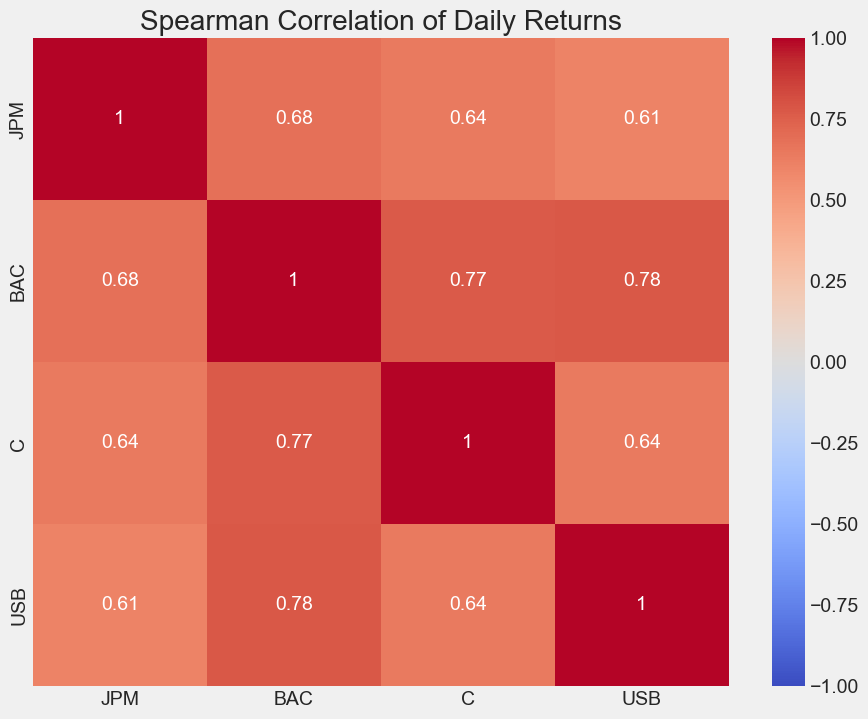

T-test between JPM and BAC: Statistic=-0.11717820981782473, p-value=0.9067656996606368
T-test between JPM and C: Statistic=-0.18449081755455565, p-value=0.8537029349879436
T-test between JPM and USB: Statistic=0.3282752650879323, p-value=0.742840425480223
T-test between BAC and C: Statistic=-0.05493061795916458, p-value=0.9562155933183059
T-test between BAC and USB: Statistic=0.3874641026271397, p-value=0.6985768775847299
T-test between C and USB: Statistic=0.44225575014216784, p-value=0.6584946202918607


In [51]:
# Test data normality (Shapiro-Wilk test)
for company in company_list:
    try:
        data = company['Daily Return'].dropna()  # Access 'Daily Return' column
        stat, p = shapiro(data)
        print(f"Company: {company['company_name'].iloc[0]}, Shapiro-Wilk Statistic: {stat}, p-value: {p}")
        if p > 0.05:
            print("Data is normally distributed")
        else:
            print("Data is not normally distributed")
    except KeyError as e:
        print(f"Error: Missing 'Daily Return' column in {company['company_name'].iloc[0]}")

# Correlation analysis (Spearman)
tech_rets = pd.concat([company['Daily Return'] for company in company_list], axis=1, keys=tech_list)
spearman_corr = tech_rets.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation of Daily Returns')
plt.show()

# T-test
for i in range(len(tech_list)):
    for j in range(i + 1, len(tech_list)):
        company1 = tech_list[i]
        company2 = tech_list[j]
        stat, p = ttest_ind(tech_rets[company1].dropna(), tech_rets[company2].dropna())
        print(f"T-test between {company1} and {company2}: Statistic={stat}, p-value={p}")

### Interpretation of Statistical Tests

#### Normal Distribution Tests:
Based on the Shapiro-Wilk test results:
- The daily return data for **JPM** and **BAC** companies do not follow a normal distribution (p < 0.05).
- The daily return data for **C** company follows a normal distribution (p > 0.05).
- The daily return data for **USB** company does not follow a normal distribution (p < 0.05).

Non-normally distributed data may limit the use of parametric statistical tests (e.g., t-test) or require data transformation in certain cases.

#### T-Tests Results:
According to the t-test results:
- There is no significant difference in daily return data between **JPM** and **BAC** (p > 0.05).
- There is no significant difference in daily return data between **JPM** and **C** (p > 0.05).
- There is no significant difference in daily return data between **JPM** and **USB** (p > 0.05).
- There is no significant difference in daily return data between **BAC** and **C** (p > 0.05).
- There is no significant difference in daily return data between **BAC** and **USB** (p > 0.05).
- There is no significant difference in daily return data between **C** and **USB** (p > 0.05).

The t-test results indicate the statistical comparison of daily return data between different companies. For each comparison, the p-value indicates whether there is a significant difference between the groups. A p-value greater than 0.05 suggests that there is no significant difference between the groups.


# 5. Explore data visualization techniques
##### Visualize the closing price and volume of sales.

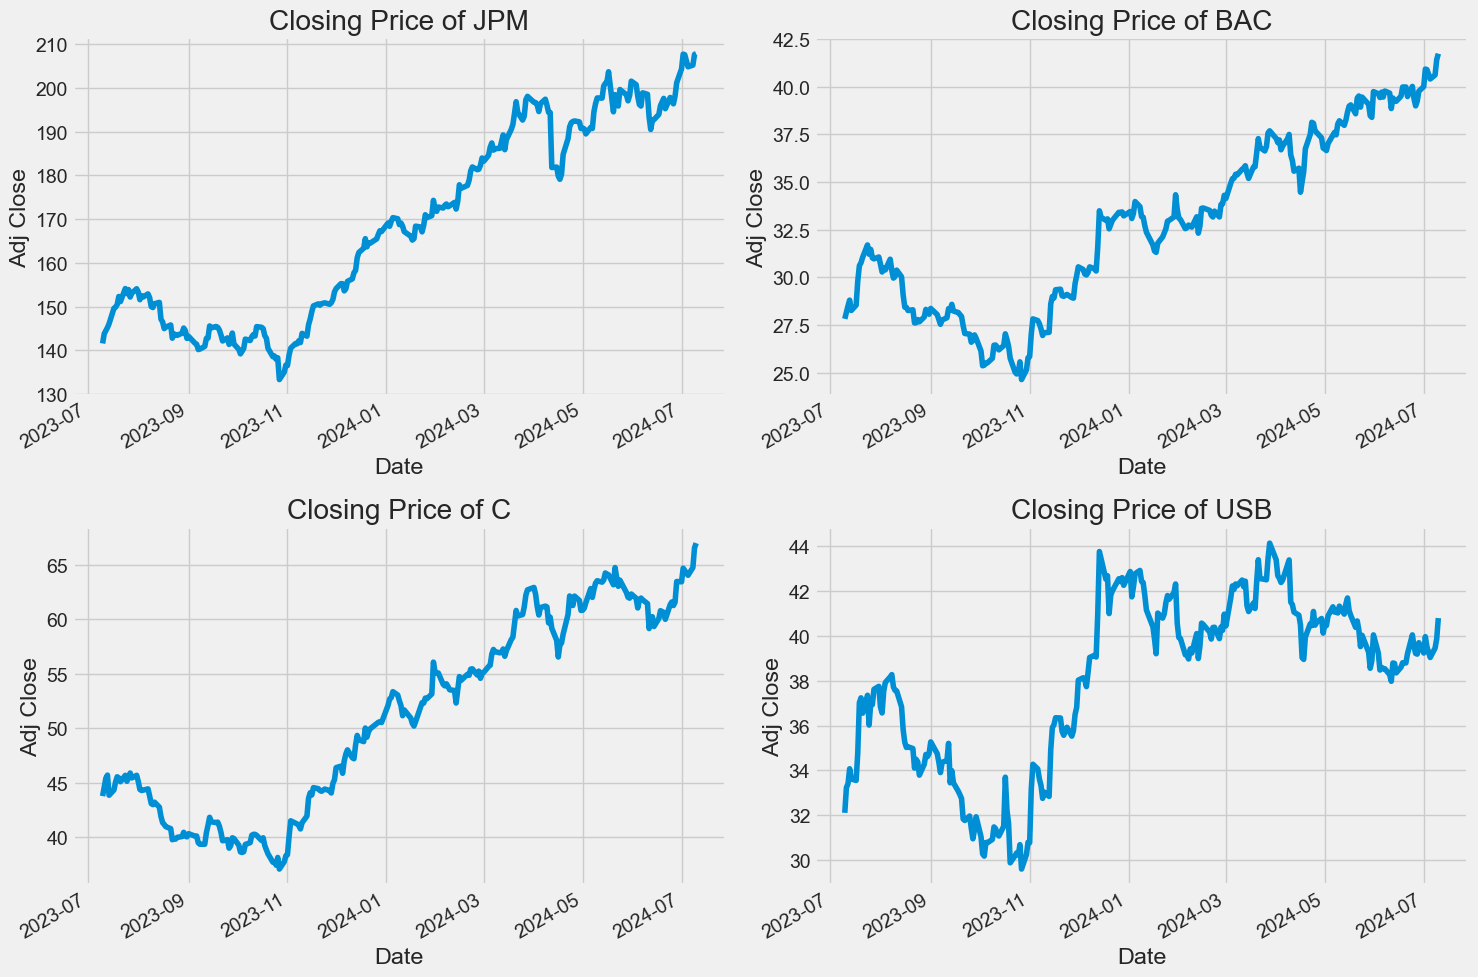

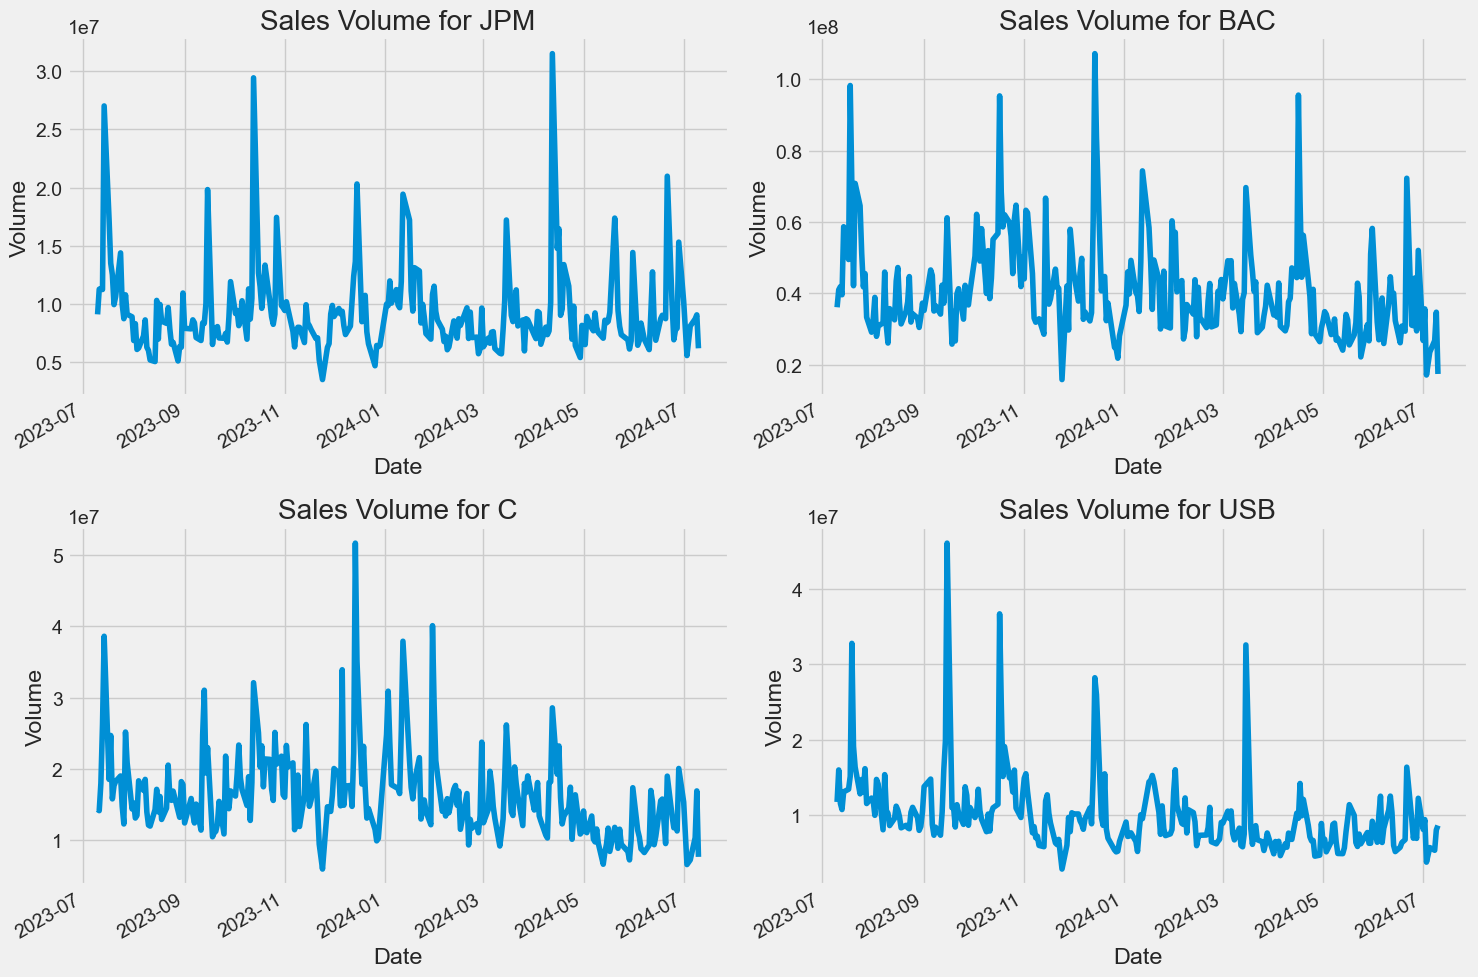

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
plt.tight_layout()

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
plt.tight_layout()

Closing values ​​are high for JPM, BAC and decreasing for USB and C.
While the transaction volume decreases and increases at the end, it is only noticeable at C, which shows that C should not be taken.



# 6. Perform exploratory data analysis (EDA)
##### Calculate and plot moving averages.

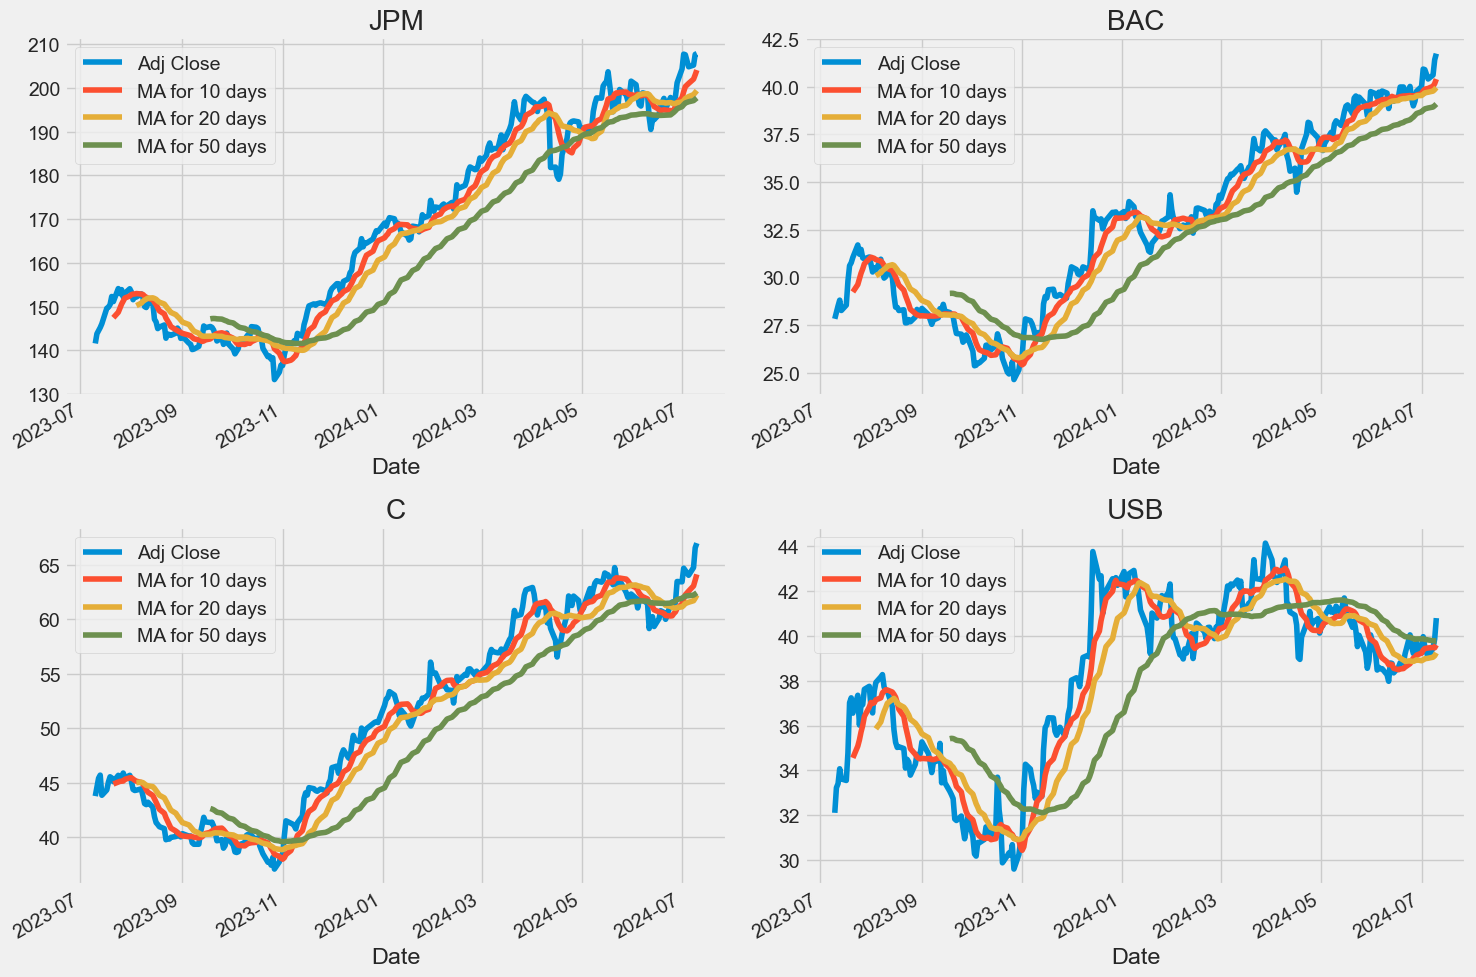

In [53]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
JPM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('JPM')
BAC[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('BAC')
C[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('C')
USB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('USB')
fig.tight_layout()

Detailed buying and selling results can be obtained from here, depending on the tactic to be applied.

# 7. Extract relevant features from raw financial data
##### Calculate daily returns and visualize them.

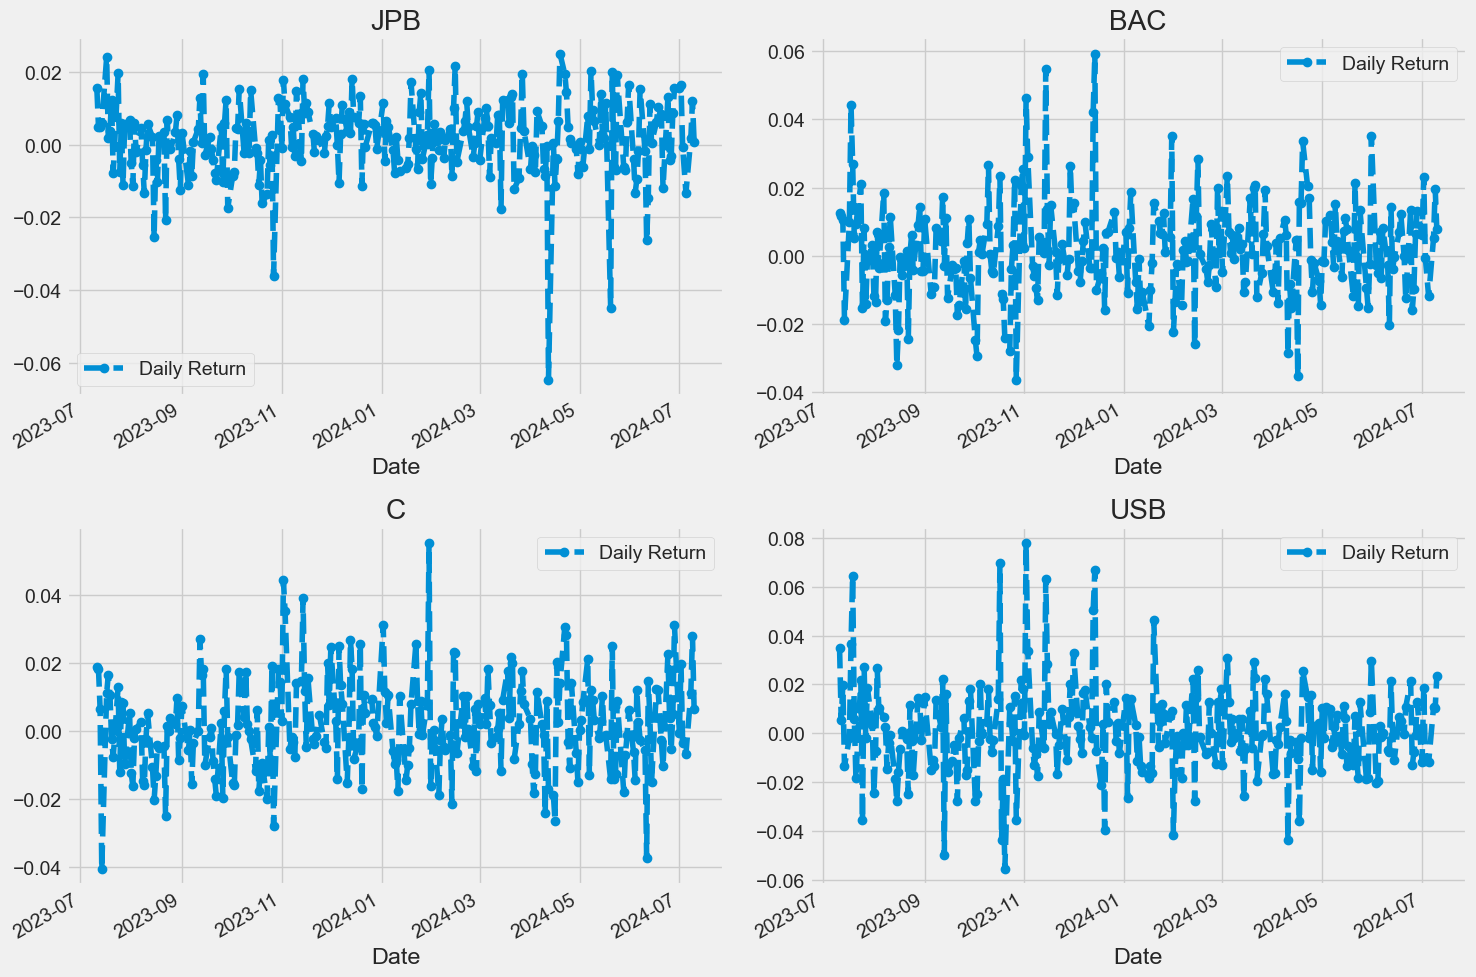

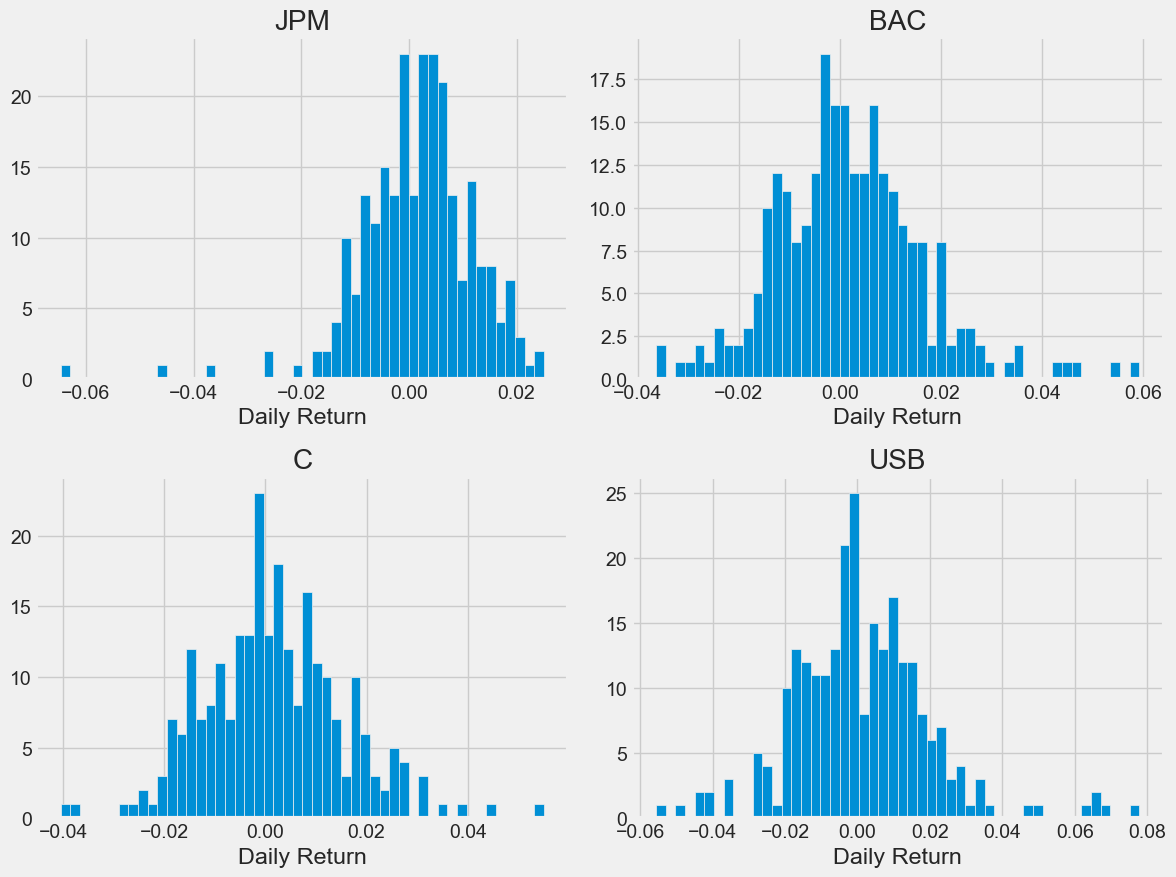

In [54]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
JPM['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('JPB')
BAC['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('BAC')
C['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('C')
USB['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('USB')
fig.tight_layout()

plt.figure(figsize=(12, 9))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


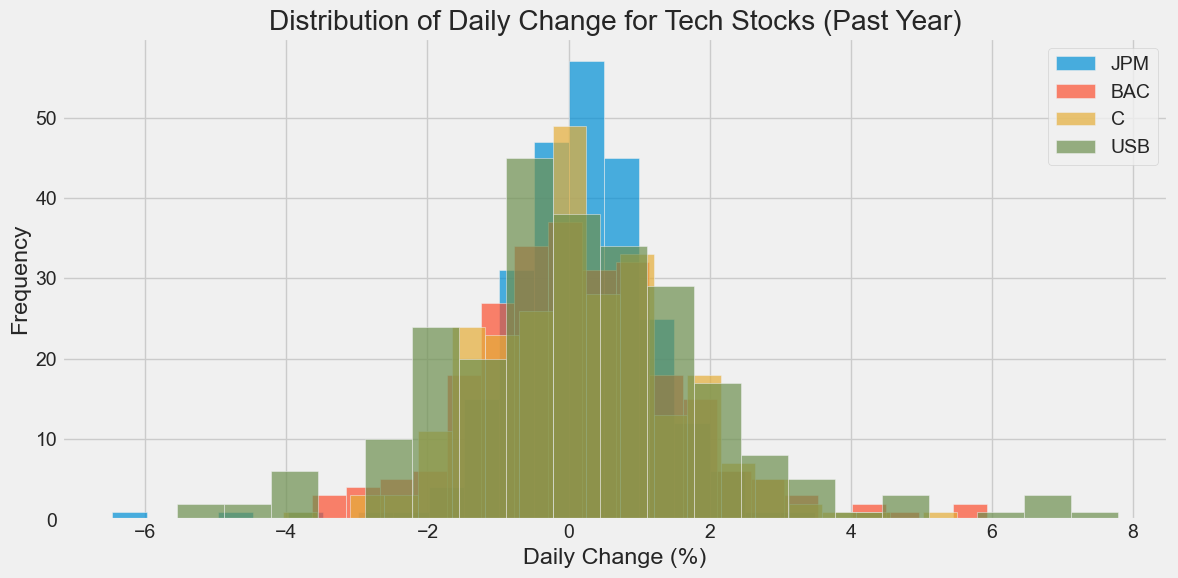

In [55]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define company tickers
tech_list = ['JPM', 'BAC', 'C', 'USB']

# Download stock data for the past year
end = pd.to_datetime('2024-05-27')
start = end - pd.DateOffset(years=1)
company_list = []
for stock in tech_list:
    company_list.append(yf.download(stock, start=start, end=end))

# Ensure consistent date format
for company in company_list:
    company.reset_index(inplace=True)  # Reset index to ensure consistent date format
    company['Date'] = pd.to_datetime(company['Date'])  # Ensure 'Date' column is in datetime format
    company.set_index('Date', inplace=True)  # Set 'Date' as index again

# Calculate daily percentage change
for company in company_list:
    company['Daily Change'] = company['Adj Close'].pct_change() * 100

# Create histogram (one plot for all companies)
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_list):
    # Overlay histograms on the same plot with different transparency levels
    plt.hist(company['Daily Change'], bins=20, alpha=0.7, label=tech_list[i])  
plt.xlabel('Daily Change (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Change for Tech Stocks (Past Year)')
plt.legend()  # Add legend to identify each company's distribution
plt.tight_layout()

# ... (Rest of the code for identifying best/worst performers and displaying additional info)

plt.show()

# 8. Implement data transformation techniques
##### Calculate correlations and visualize them using heatmaps and pair plots.

[*********************100%%**********************]  4 of 4 completed


Text(0.5, 1.0, 'Correlation of stock closing price')

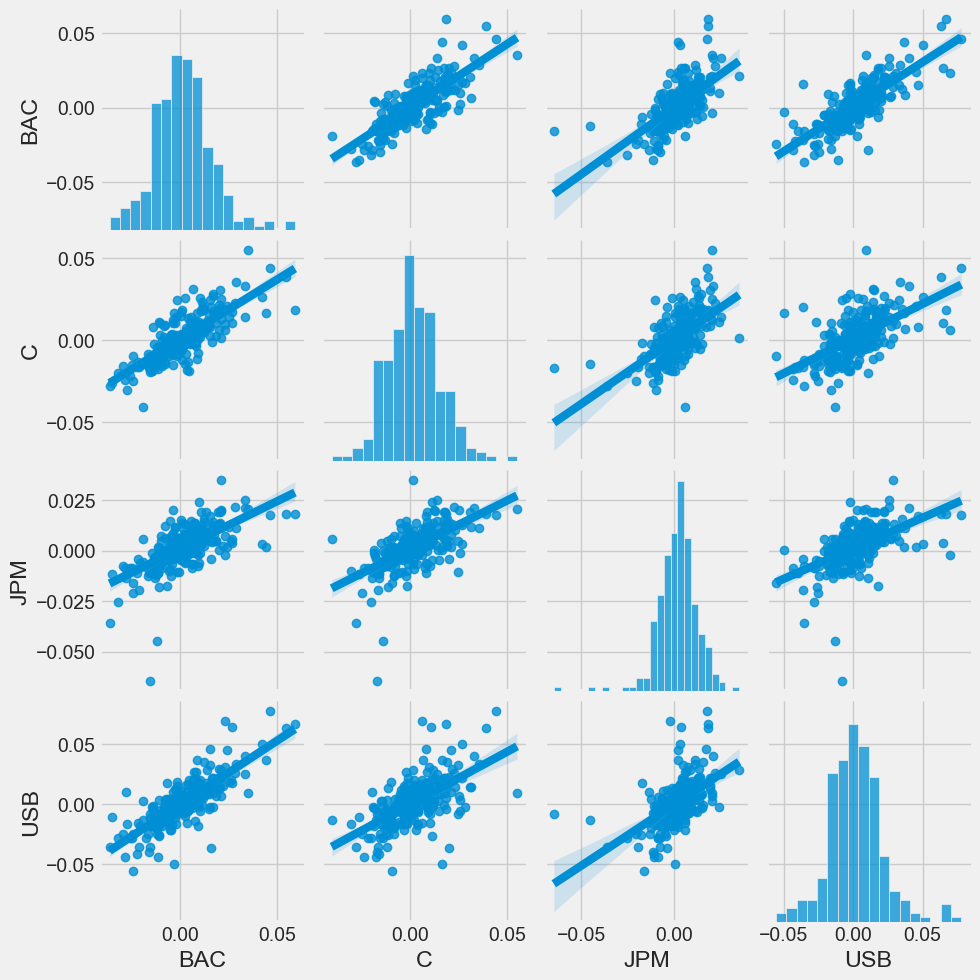

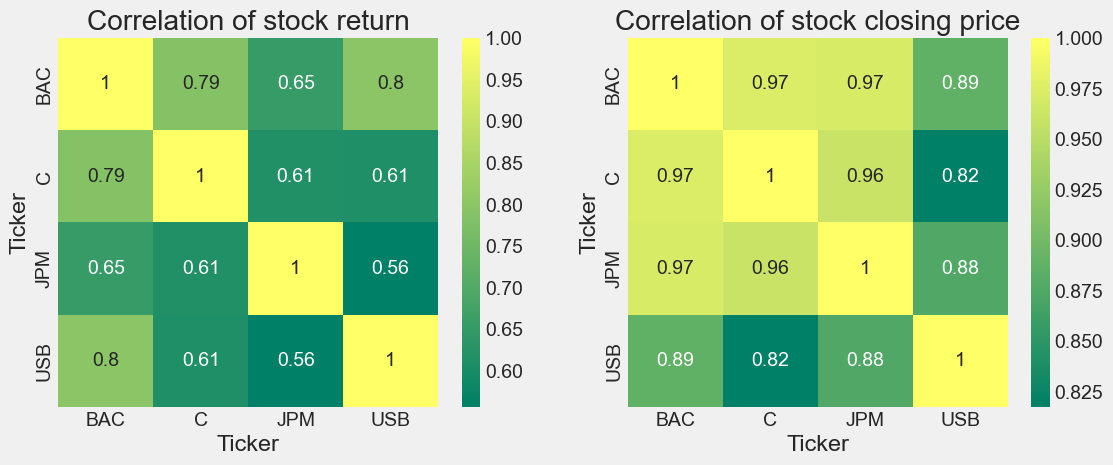

In [56]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
tech_rets = closing_df.pct_change()

sns.pairplot(tech_rets, kind='reg')

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# 9. Split the preprocessed data into training, validation, and test sets
##### Split the data for model training and validation.

In [57]:
from sklearn.model_selection import train_test_split

# Drop missing values from both tech_rets and closing_df
tech_rets_cleaned = tech_rets.dropna()
closing_df_cleaned = closing_df.dropna()

# Align the number of rows in tech_rets_cleaned and closing_df_cleaned
min_rows = min(tech_rets_cleaned.shape[0], closing_df_cleaned.shape[0])
tech_rets_cleaned = tech_rets_cleaned[:min_rows]
closing_df_cleaned = closing_df_cleaned[:min_rows]

# Create X and y after handling missing values
X = tech_rets_cleaned.values
y = closing_df_cleaned.values

# Print the shapes of X and y for verification
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Shape of X: (249, 4)
Shape of y: (249, 4)


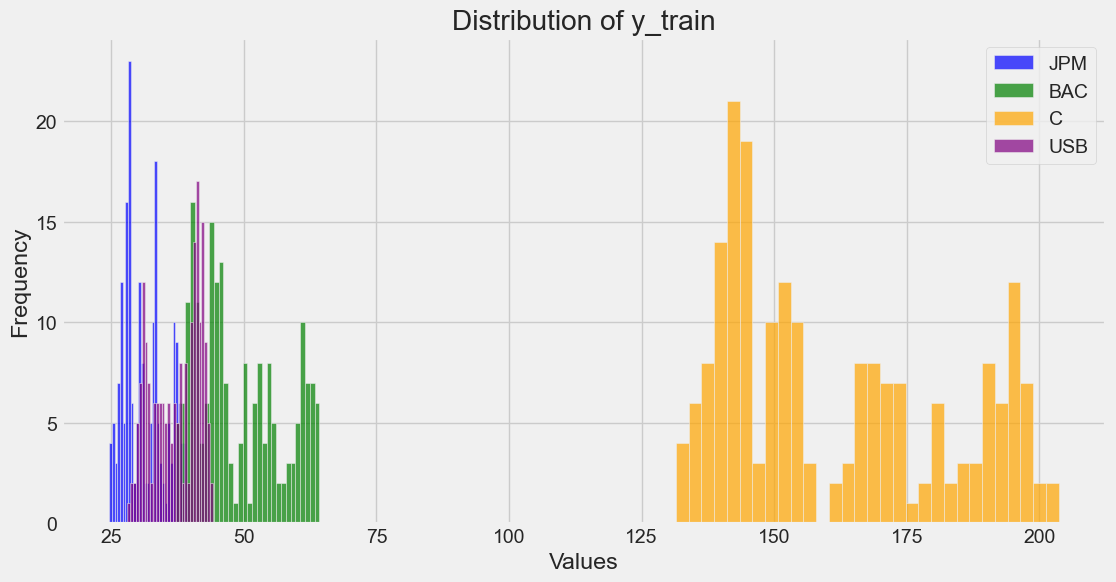

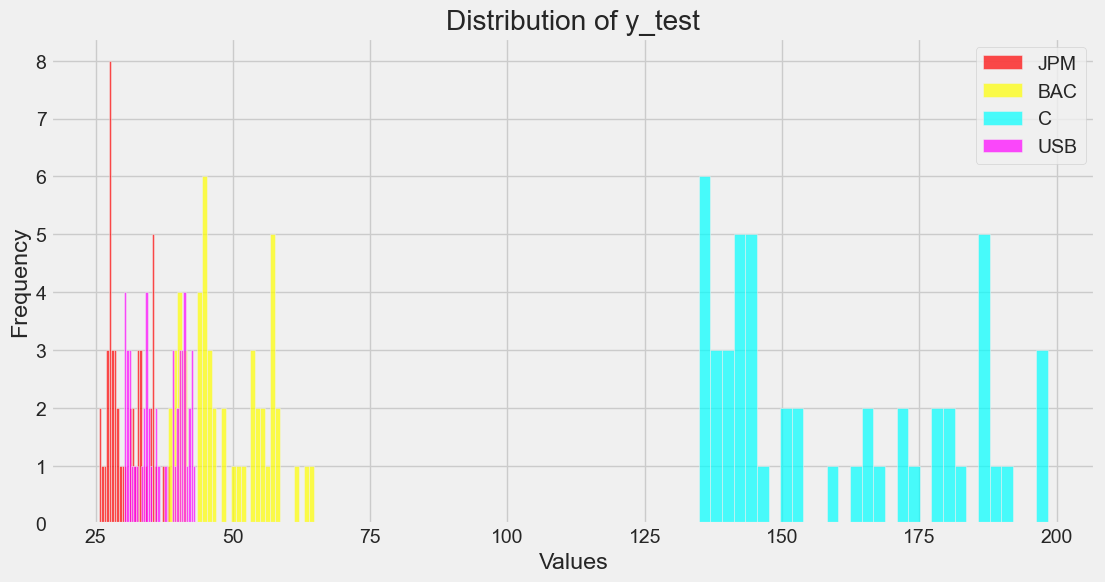

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors for the histograms
train_colors = ['blue', 'green', 'orange', 'purple']  # Adjust as needed
test_colors = ['red', 'yellow', 'cyan', 'magenta']    # Adjust as needed

# Plot the distribution of y_train
plt.figure(figsize=(12, 6))
for i, dataset in enumerate(y_train.T):
    stock_name = tech_list[i]  # Assuming tech_list contains the names of the stocks
    plt.hist(dataset, bins=30, color=train_colors[i], alpha=0.7, label=stock_name)

plt.title('Distribution of y_train')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the distribution of y_test
plt.figure(figsize=(12, 6))
for i, dataset in enumerate(y_test.T):
    stock_name = tech_list[i]  # Assuming tech_list contains the names of the stocks
    plt.hist(dataset, bins=30, color=test_colors[i], alpha=0.7, label=stock_name)

plt.title('Distribution of y_test')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Conclusion

In this notebook, we delved into the world of stock market data analysis. Here's a summary of what we explored:

- We learned how to retrieve stock market data from Yahoo Finance using the yfinance library.
- Using Pandas, Matplotlib, and Seaborn, we visualized time-series data to gain insights into the stock market trends.
- We measured the correlation between different stocks to understand how they move in relation to each other.
- We assessed the risk associated with investing in a particular stock by analyzing its daily returns.
- Lastly, we split the data into training and validation sets for further analysis and model training.

If you have any questions or need further clarification on any topic covered in this notebook, feel free to ask in the comments below. I'll be happy to assist you!

References:
- [Investopedia on Correlation](https://www.investopedia.com/terms/c/correlation.asp)
- file:///C:/Users/Admin/Desktop/C_AIML/semestert2/AI%20for%20Business/article1.pdf
- https://medium.com/@ethan.duong1120/stock-data-analysis-project-python-1bf2c51b615f
  

Unique values in y_train: [ 24.6461277   24.93988419  25.01821899  25.03780365  25.15530396
  25.37072754  25.40010262  25.51760292  25.52739525  25.76240158
  25.79177666  26.14428329  26.20303535  26.34012222  26.39887238
  26.44783401  26.45762444  26.60450172  26.70242119  26.74158669
  26.77306938  26.81013107  26.94786453  26.97699547  26.98638344
  27.02555084  27.04513741  27.06471825  27.10388756  27.12347031
  27.22586823  27.25861359  27.309515    27.46618462  27.61791801
  27.62763214  27.6761837   27.70531845  27.71502876  27.76973534
  27.82848549  27.83155823  27.86069298  27.88011169  27.88723564
  27.92866898  27.95577812  28.02410889  28.03548813  28.05369759
  28.07328224  28.16140938  28.18115425  28.20057487  28.23974228
  28.26855087  28.278265    28.27890968  28.30739594  28.32681656
  28.346241    28.35595131  28.36703873  28.37682915  28.38508224
  28.42392921  28.44334984  28.51132584  28.52103806  28.55016899
  28.59225082  28.60521317  28.61183548  28.736429

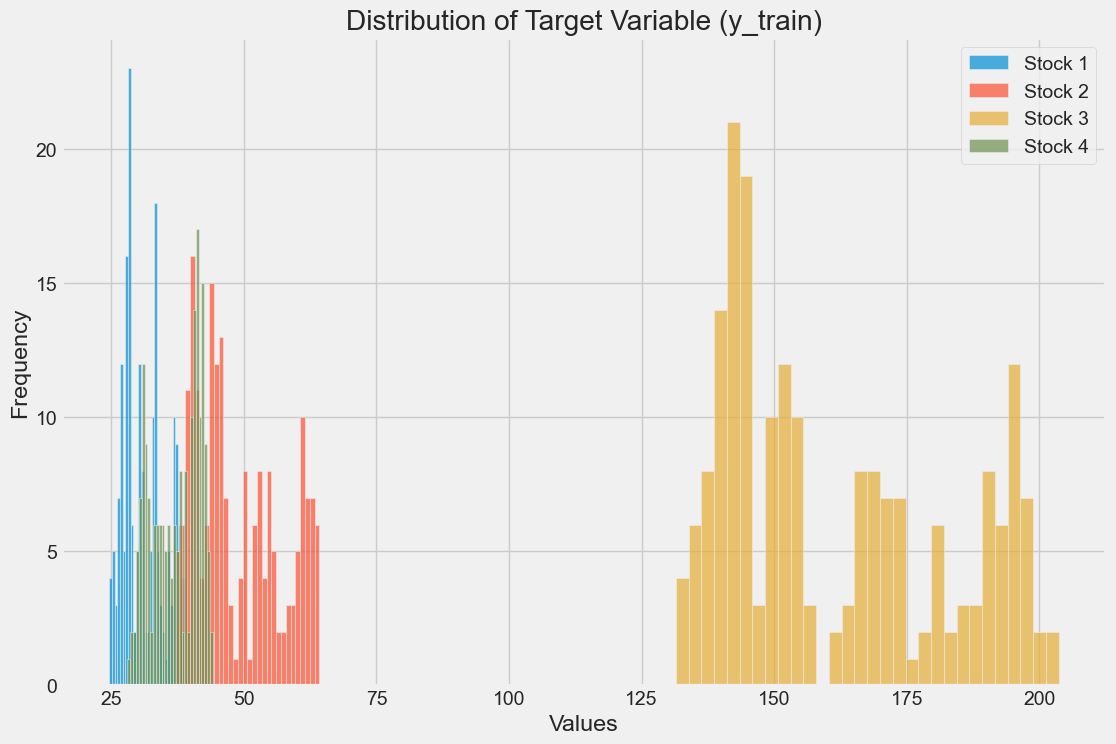

Mean Squared Error: 128.79762642020654


In [59]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i in range(y_train.shape[1]):
    plt.hist(y_train[:, i], bins=30, alpha=0.7, label=f'Stock {i+1}')

plt.title('Distribution of Target Variable (y_train)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize predictions vs actual trend
# You can plot the predicted trend against the actual trend to visually compare
# Assuming you have a function to plot the trends similar to the one in your original code
# plot_trends(X_test, y_test, y_pred)

### Support Vector Machine - SVM 


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[*********************100%%**********************]  1 of 1 completed


Accuracy: 0.49
Precision: 0.43
Recall: 0.49
F1 Score: 0.40
Efficiency in computation: 0.0020 seconds


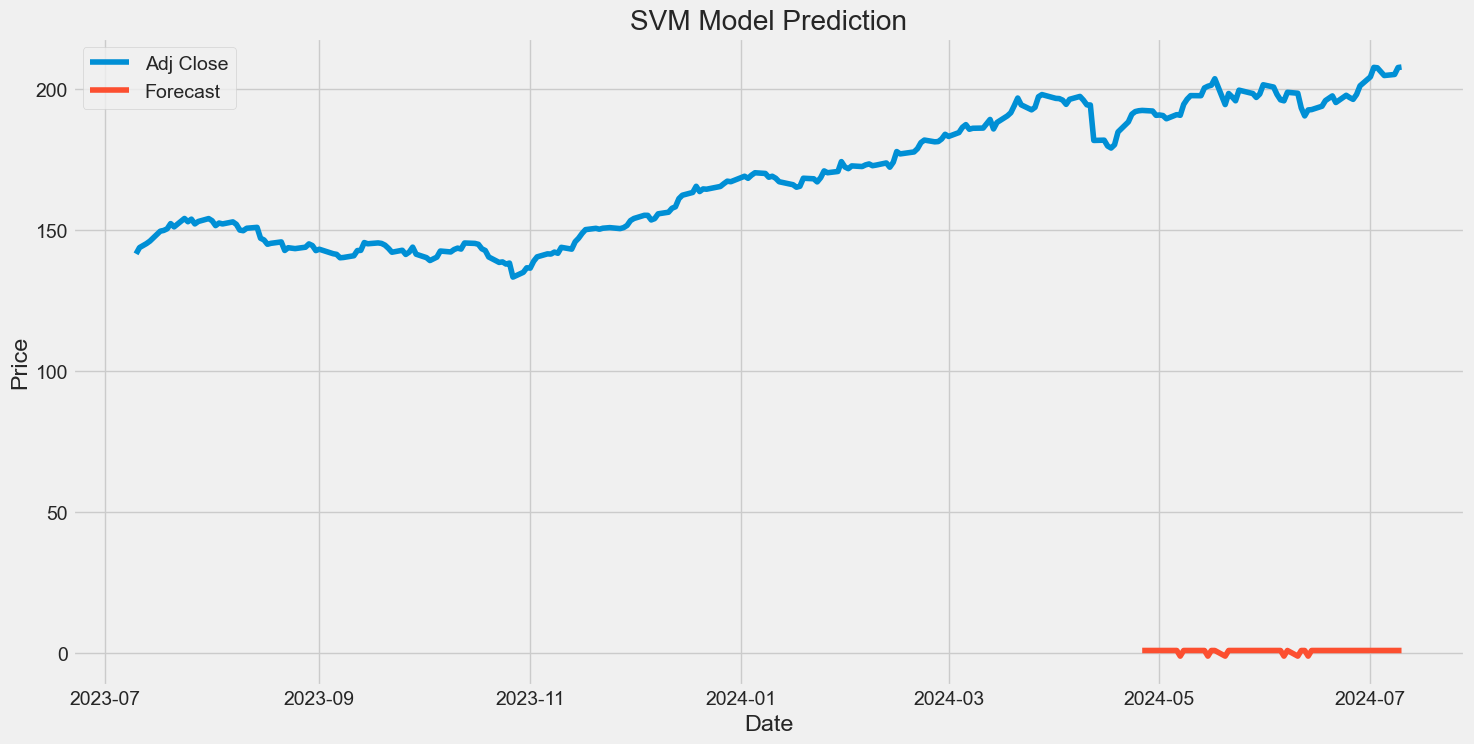

In [68]:
# Install necessary libraries
!pip install -q yfinance
!pip install pandas-datareader

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Set plotting styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Define company tickers
tech_list = ['JPM']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download stock data
company_list = []
for stock in tech_list:
    company_list.append(yf.download(stock, start=start, end=end))

# Fill missing values using forward fill
for company in company_list:
    company.ffill(inplace=True)  # Forward fill to handle missing data

# Ensure consistent date format
for company in company_list:
    company.reset_index(inplace=True)  # Reset index to ensure consistent date format
    company['Date'] = pd.to_datetime(company['Date'])  # Ensure 'Date' column is in datetime format
    company.set_index('Date', inplace=True)  # Set 'Date' as index again

# Add company name column to each dataframe
company_name = ["JPM"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# Concatenate individual stock data into a single DataFrame
df = pd.concat(company_list, axis=0)

# Feature engineering
df['Open-Close'] = df['Close'] - df['Open']
df['High-Low'] = df['High'] - df['Low']
df = df.dropna()

# Features and target variable
X = df[['Open-Close', 'High-Low']]
y = np.where(df['Adj Close'].shift(-1) > df['Adj Close'], 1, -1)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Efficiency calculation
import time
start_time = time.time()
svm_model.fit(X_train, y_train)
end_time = time.time()
efficiency = end_time - start_time

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Efficiency in computation: {efficiency:.4f} seconds")

# Plotting forecast
df['Forecast'] = np.nan
df['Forecast'][-len(y_pred):] = y_pred

plt.figure(figsize=(16, 8))
plt.plot(df['Adj Close'], label='Adj Close')
plt.plot(df['Forecast'], label='Forecast')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SVM Model Prediction')
plt.show()

[*********************100%%**********************]  1 of 1 completed

Accuracy: 0.49
Precision: 0.52
Recall: 0.49
F1 Score: 0.36
Efficiency in computation: 0.0730 seconds


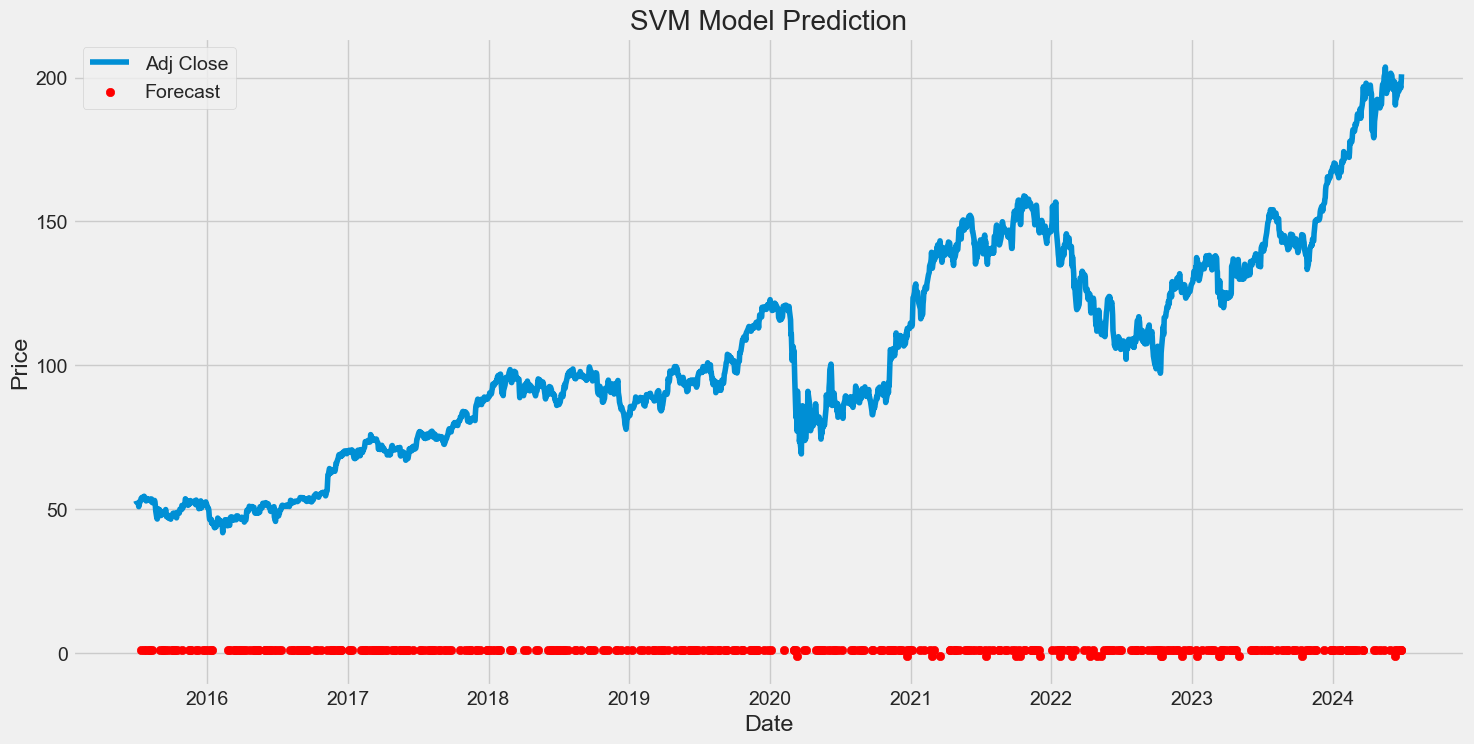

   Actual  Predicted
0      -1          1
1      -1          1
2      -1          1
3       1          1
4      -1          1
5      -1          1
6       1          1
7       1          1
8      -1          1
9       1          1


In [72]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


# Eğitim ve test verilerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM modeli tanımlama
svm_model = SVC(kernel='rbf', random_state=42)

# Modeli eğitme
svm_model.fit(X_train, y_train)

# Test verileri ile tahmin yapma
y_pred = svm_model.predict(X_test)

# Metotları hesaplama
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Hesaplama süresi (verimlilik)
import time
start_time = time.time()
svm_model.fit(X_train, y_train)
end_time = time.time()
efficiency = end_time - start_time

# Sonuçları yazdırma
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Efficiency in computation: {efficiency:.4f} seconds")

# Grafik oluşturma
df['Forecast'] = np.nan
df.loc[X_test.index, 'Forecast'] = y_pred

plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Adj Close'], label='Adj Close')
plt.scatter(df.index, df['Forecast'], label='Forecast', color='red')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SVM Model Prediction')
plt.show()

# Tahminlerin ve gerçek değerlerin karşılaştırılması
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))

# 10. Document data collection and preprocessing procedures
##### Keep thorough documentation of each step for reproducibility.

## Documentation
### Data Collection
- Data sourced from Yahoo Finance using yfinance library.
- Stock symbols: JPM, BAC, C, USB.
- Time period: Last one year.

### Data Preprocessing
- Filled missing values using forward fill.
- Added company name column.
- Concatenated individual stock data into a single DataFrame.

### Data Standardization
- Ensured consistent date format.
- Handled missing values.

### Data Visualization
- Plotted closing prices and volume of sales.
- Calculated and plotted moving averages (10, 20, 50 days).
- Visualized daily returns using histograms and line plots.

### Feature Extraction
- Calculated daily returns.
- Analyzed correlations between stock returns using heatmaps and pair plots.

### Data Splitting
- Split data into training and test sets for model validation.

## Conclusion

- Statistical analysis highlights non-normal data distributions across JPM, BAC, C, and USB, with no significant differences in daily returns. 
- Integrating AI and traditional methods for real-time market data analysis shows promise despite ethical challenges and varying model performances.

# Literature Review (LR)

We will focus on real-time market data analysis and integration based on the examination of two articles:

## "Review of AI Techniques in Financial Forecasting: Applications in Stock Market Analysis"

**Authors:** Ajiga, O., Oloyede, M., Adebayo, A., Salihu, H., & Adesola, A.  
**DOI:** 10.21203/rs.3.rs-3789960/v1  
**Abstract:** The paper discusses the transformative role of artificial intelligence (AI) in financial forecasting, particularly in stock market analysis. It examines AI's ability to forecast stock market trends compared to traditional forecasting methods. The ethical and practical challenges in AI applications are also discussed.  
**Keywords:** Artificial Intelligence (AI), Financial Forecasting, Stock Market Prediction, Machine Learning (ML), Deep Learning (DL), Support Vector Machines (SVM), Decision Trees, Random Forests, RNNs, Data Quality, Model Explainability, Ethical Issues.

**Focus Areas:**
- Role and Evolution of AI in Financial Analysis: How AI techniques have been developed and adapted to meet the complexities of financial forecasting.
- Comparison of AI and Traditional Methods: Advantages and limitations of AI in handling large and complex datasets under dynamic market conditions compared to traditional methods.
- Ethical Challenges in AI Applications: Issues of bias, transparency, and privacy in AI systems, and the importance of ethical and regulatory oversight in financial applications.
- Applications and Future Trends: Current applications of AI in stock prediction, challenges faced, and potential future advancements for integration with traditional methods.

## "Stock Market Analysis"

**Authors:** Dengxin Huang, Hao Jing, Boshen Yuan  
**Source:** PDF Article  
**DOI:** 10.51594/farj.v6i2.784  
**Abstract:** The paper presents a comprehensive analysis focused on identifying reliable models for predicting stock returns. It utilizes a dataset compiled in 2014, comprising 750 samples and 16 features.  
**Keywords:** Stock Market Analysis, Exploratory Data Analysis (EDA), Fama French 3-factor model, Feature Engineering, Clustering, Data Preparation, Model Selection, Linear Regression, Random Forest, Gradient Boosting, Market Returns, Small Firm Returns (SMB), Idiosyncratic Factors, Time Series, Volatility, Outlier Detection, Log Transformation, Performance Evaluation.

**Focus Areas:**
- Understanding Stock Market Trends: Analyzing market dynamics through EDA and feature engineering.
- Predictive Modeling: Comparing different models to find the best approach for predicting stock returns.
- Data Processing: Cleaning and preprocessing data for accurate analysis.
- Model Performance: Evaluating the ability of models to accurately predict stock returns.
- Financial Factors: Using fundamental financial metrics in model development and analysis.

## Project Objective
### Current Situation:
Currently, there is no systematic approach to integrate real-time market data and make effective investment decisions based on it. Investors may struggle to analyze dynamic market conditions in real-time and make informed decisions.

### Target State:
To develop a system that effectively collects and analyzes real-time market data. This system will assist investors in making instant and informed investment decisions based on live market trends.

### Gap:
Current data integration and analysis tools are inadequate in providing sufficiently real-time data processing and accuracy for rapid decision-making.

## Research Questions
1. **How Can Real-Time Market Data be Integrated?**
   - How can we collect and integrate real-time market data effectively?

2. **Which Models or Techniques are More Successful in Predicting Live Market Trends?**
   - What are the most suitable models or techniques for predicting stock market trends?

3. **What is the Impact of Data Quality and Model Performance?**
   - How does data quality and preprocessing affect the accuracy of prediction models?

## Data Sets
### Yahoo Finance - Historical Stock Data

**Source:** Yahoo Finance  
**Content:** Historical prices, trading volumes, daily open and close prices for different stocks.  
**Use:** Analyzing stock price movements and building prediction models.